# Access data from Open Microscopy database
## Table of Contents
- [Introduction](#Introduction)
- [Access the data from Open Microscopy](#Access-the-data-from-Open-Microscopy)
- [Access a list of all publicly available projects](#Access-a-list-of-all-publicly-available-projects)
- [Access metadata on one single project](#Access-metadata-on-one-single-project)
- [Access single dataset from project](#Access-single-dataset-from-project)
- [Access individual microscopy images from dataset](Access-individual-microscopy-images-from-dataset)
- [Simple Cell Counting (in the Image chosen above)](Simple-Cell-Counting-in-the-Image-chosen-above)
- [Publish reusable MATLAB code for reproducible results](Publish-reusable-MATLAB-code-for-reproducible-results)

## Introduction
**Public Data:** Many public databases have been created for the purposes of making data freely accessible to the scientific community. A best practice is to assign a unique identifier to a dataset, so that it is discoverable. A common form of a unique identifier is a [Digital Object Identifier](https://en.wikipedia.org/wiki/Digital_object_identifier) or DOI which points to the data. 

**Access Public Data:** To access and process public data, you can use several routes. 
- Download data files to your local machine and work with them in MATLAB. 
- Access data directly via an API. MATLAB's [`webread`](https://www.mathworks.com/help/matlab/ref/webread.html?searchHighlight=webread&s_tid=srchtitle_webread_1) function reads the RESTful API used by many portals.
- If the portal offers only Python bindings, [call Python from MATLAB](https://www.mathworks.com/help/matlab/call-python-libraries.html).

**Data formats:** MATLAB supports a wide range of data formats
- There are a wide range of scientific data formats that can be [natively read in MATLAB](https://www.mathworks.com/help/matlab/scientific-data.html). They include NetCDF and HDF5 as well as more specialized data formats. 
- In addition, the [Bioinformatics Toolbox](https://www.mathworks.com/products/bioinfo.html) contains [built-in functions](https://www.mathworks.com/help/bioinfo/ug/data-formats-and-databases.html) to read data from many online data repositories in standard bioinformatics data formats.
- Sometimes data import functions may be [written by the community](https://www.mathworks.com/matlabcentral/fileexchange?q=data+read), and published on the MATLAB [File Exchange](https://www.mathworks.com/matlabcentral/fileexchange/) - a portal for community contributions in MATLAB. All community  contributions are covered by open source licenses, which means they can be re-used, modified or added to. Exact terms and conditions depend on the licenses used by the authors.

In this example, we will access microscopy data from the Image Data Resource (IDR) on the [Open Microscopy database](https://idr.openmicroscopy.org/). 

## Access the data from Open Microscopy
### Access a list of all publicly available projects
Clear the workspace

In [1]:
clearvars; clc

Construct some url addresses to query the data

In [2]:
baseUrl = "https://idr.openmicroscopy.org"; % main portal
projectsUrl = baseUrl + "/webgateway/proj/list/"; % list of projects

Read in all the projects available on the database into a [table](https://www.mathworks.com/help/matlab/ref/table.html)

In [3]:
projects = webread(projectsUrl);
projectTable = struct2table(projects)

projectTable = 114x3 table
   <strong>id</strong>                            <strong>name</strong>                                     <strong>description</strong>         
    <strong>____</strong>    <strong>___________________________________________________</strong>    <strong>_____________________________</strong>

     201    {'idr0032-yang-meristem/experimentA'              }    {'Publication Title...'     }
     101    {'idr0018-neff-histopathology/experimentA'        }    {'Experiment Description...'}
     301    {'idr0026-weigelin-immunotherapy/experimentA'     }    {'Publication Title...'     }
     401    {'idr0040-aymoz-singlecell/experimentA'           }    {'Publication Title...'     }
      52    {'idr0023-szymborska-nuclearpore/experimentA'     }    {'Publication Title...'     }
      51    {'idr0021-lawo-pericentriolarmaterial/experimentA'}    {'Publication Title...'     }
     754    {'idr0052-walther-condensinmap/experimentC'       }    {'Publication Title...'     }
     751    {'idr0052-walther-condensinmap'                   }    {'Publication Title...'     }
     351    {'idr0038-held-kidneylightsheet/experimentA'      }    {'Publication Title...'     }
     404    {'idr0041-cai-mitoticatlas/experimentA'           }    {'Publication Title...'     }
     402    {'idr0042-nirschl-wsideeplearning/experimentA'    }    {'Publication Title...'     }
     352    {'idr0038-held-kidneylightsheet/experimentB'      }    {'Publication Title...'     }
    1701    {'idr0106-kubota-lunglightsheet/experimentA'      }    {'Publication Title...'     }
    1902    {'idr0110-rodermund-xistrna/experimentA'          }    {'Publication Title...'     }
     354    {'idr0038-held-kidneylightsheet'                  }    {'Publication Title...'     }
     151    {'idr0027-dickerson-chromatin/experimentA'        }    {'Publication Title...'     }

Some rows have /experiment as a suffix to their names. These are projects containing actual data. Only display these and sort them by their IDs

In [4]:
projectTable = projectTable(contains(projectTable.name,"/experiment"),:);
sortrows(projectTable,"id")

ans = 99x3 table
   <strong>id</strong>                            <strong>name</strong>                                     <strong>description</strong>         
    <strong>___</strong>    <strong>___________________________________________________</strong>    <strong>_____________________________</strong>

     51    {'idr0021-lawo-pericentriolarmaterial/experimentA'}    {'Publication Title...'     }
     52    {'idr0023-szymborska-nuclearpore/experimentA'     }    {'Publication Title...'     }
    101    {'idr0018-neff-histopathology/experimentA'        }    {'Experiment Description...'}
    151    {'idr0027-dickerson-chromatin/experimentA'        }    {'Publication Title...'     }
    201    {'idr0032-yang-meristem/experimentA'              }    {'Publication Title...'     }
    301    {'idr0026-weigelin-immunotherapy/experimentA'     }    {'Publication Title...'     }
    351    {'idr0038-held-kidneylightsheet/experimentA'      }    {'Publication Title...'     }
    352    {'idr0038-held-kidneylightsheet/experimentB'      }    {'Publication Title...'     }
    353    {'idr0038-held-kidneylightsheet/experimentC'      }    {'Publication Title...'     }
    401    {'idr0040-aymoz-singlecell/experimentA'           }    {'Publication Title...'     }
    402    {'idr0042-nirschl-wsideeplearning/experimentA'    }    {'Publication Title...'     }
    404    {'idr0041-cai-mitoticatlas/experimentA'           }    {'Publication Title...'     }
    405    {'idr0045-reichmann-zygotespindle/experimentA'    }    {'Publication Title...'     }
    501    {'idr0043-uhlen-humanproteinatlas/experimentA'    }    {'Publication Title...'     }
    502    {'idr0044-mcdole-tardislightsheet/experimentA'    }    {'Publication Title...'     }
    503    {'idr0047-neuert-yeastmrna/experimentA'           }    {'Publication Title...'     }

Convert the text into the datatype string for easier indexing and manipulation

In [5]:
projectTable.name = string(projectTable.name);
projectTable.description = string(projectTable.description);

### Access metadata on one single project
Select the project from the list of projects

In [6]:
% extract project descriptions into string array
descriptions = arrayfun(@splitlines,projectTable.description,'UniformOutput',false);
descriptions = cellfun(@(x)(string(x{2})),descriptions);

% populate user menu with descriptions
thisProject = descriptions(87);
projectMatches = projectTable(descriptions==thisProject,:);

% check if multiple experiments correspond to one project
if height(projectMatches) > 1
    ExptNames = projectMatches.name;
    ExptNames = split(ExptNames,"/");
    ExptNames = ExptNames(:,2);
    selectedExpt = ExptNames(1);
    projectMatches = projectMatches(contains(projectMatches.name,selectedExpt),:);
end

thisProject = projectMatches.id;

Query this particular project and list all the metadata associated with that project

In [10]:
projectInfoUrl = baseUrl + "/webgateway/proj/"+num2str(thisProject)+"/detail/";
projectInfo = webread(projectInfoUrl);
projectInfo.description = splitlines(projectInfo.description);
projectInfo.PublicationTitle = string(projectInfo.description(2));
projectInfo.description = string(projectInfo.description(5))

projectInfo = struct with fields:
   type: 'Project'
                  id: 2251
                name: 'idr0123-mota-mifish/experimentA'
         description: "Datasets 1 and 2 are replicates of the same experimental design which consists of 16 probes targeting 16 consecutive loci on chromosome 2 using iFISH4U. The 16 probes targeting different loci are spaced with 3 or 20 Mb in order to study relatively small genomic distances and compare them with larger distances. Furthermore, 10 loci are made by a combination of two colours alternating within the locus and 6 loci have only one colour. Dataset 3 is a single colour experiment where one probe with alternated colours (AF488-AF594) was tested together with other two probes in different colours located in distinct genomic sites. There is 1 probe with AF488 dye, 1 probe with AT542, 1 probe with AF594 and 1 probe with AT647N. Dataset 4 is a single colour experiment where one probe with alternated colours (AT542-AT647N) was tested together with two other probes in different colours located in distinct genomic sites. There is 1 probe with AF488 dye, 1 probe with AT542, 1 probe with AF594 and 1 probe with AT647N. Dataset 5 consists of 23 probes targeting 23 consecutive loci on chromosome 1 using iFISH4U. The 23 loci are spaced with 10 Mb. There are 3 probes with AF488 dye, 4 probes with AT542, 4 probes with AF594, 4 probes with AT647N, 4 probes with AF700 and 4 probes with AF790. Datasets 6 and 7 are replicates of the same experimental design which consists of 21 probes targeting 21 consecutive loci on chromosome 2 using iFISH4U. The 23 loci are spaced with 10 Mb. There are 3 probes with AF488 dye, 3 probes with AT542, 3 probes with AF594, 3 probes with AT647N, 6 probes with AF700 and 3 probes with AF790. Datasets 8 and 9 are replicates of the same experimental design which consists of 13 probes targeting 13 consecutive loci on chromosome 10 using iFISH4U. The 23 loci are spaced with 10 Mb. There are 2 probes with AF488 dye, 2 probes with AT542, 3 probes with AF594, 2 probes with AT647N, 2 probes with AF700 and 2 probes with AF790."
    PublicationTitle: "Simultaneous visualization of DNA loci in single cells by combinatorial multi-color iFISH"

Often, projects (and datasets and images) can be accompanied by further annotations. Let's read the annotations attached to this project:

In [11]:
allAnnotations = webread(baseUrl + "/webclient/api/annotations/?project=" + num2str(projectInfo.id));

Take the first annotation ("MapAnnotationI") containing the metadata related to the project including the publication DOI and turn it into a dictionary using the MATLAB function `dictionary`

In [12]:
annotationValues = horzcat(allAnnotations.annotations{1}.values{:});
annotationValues = cellfun(@string, annotationValues);
annotationDictionary = dictionary(annotationValues(1,:),annotationValues(2,:))

annotationDictionary = 
   <a href="matlab:helpPopup dictionary" style="font-weight:bold">dictionary</a> (<strong>string</strong> ⟼ <strong>string</strong>) with 13 entries:

    "Sample Type"         ⟼ "cell"
    "Organism"            ⟼ "Homo sapiens"
    "Study Type"          ⟼ "fluorescence in situ hybridization"
    "Imaging Method"      ⟼ "epifluorescence microscopy"
    "Publication Title"   ⟼ "Simultaneous visualization of DNA loci in single cells by combinatoria..."
    "Publication Authors" ⟼ "Mota A, Schweitzer M, Wernersson E, Crosetto N, Bienko M"
    "PubMed ID"           ⟼ "35145120 https://www.ncbi.nlm.nih.gov/pubmed/35145120"
    "Publication DOI"     ⟼ "10.1038/s41597-022-01139-2 https://doi.org/10.1038/s41597-022-01139-2"
    "Release Date"        ⟼ "2022-02-28"
    "License"             ⟼ "CC BY 4.0 https://creativecommons.org/licenses/by/4.0/"
    "Copyright"           ⟼ "Mota et al"
    "Data Publisher"      ⟼ "University of Dundee"
    "Annotation File"     ⟼ "idr0123-experimentA-annotation.csv https://github.com/IDR/idr0123-mota..."

Next, we read in all the datasets related to this project

In [14]:
projectDatasetUrl = baseUrl + "/webgateway/proj/"+num2str(thisProject)+"/children/";
datasets = webread(projectDatasetUrl);
disp(struct2table(datasets))

       type         id                        name                       description    child_count
    ___________    _____    _________________________________________    ___________    ___________

    {'Dataset'}    16551    {'1_miFISH chr2 Replicate 1'            }    {0x0 char}         25     
    {'Dataset'}    16552    {'2_miFISH chr2 Replicate 2'            }    {0x0 char}         19     
    {'Dataset'}    16553    {'3_miFISH AF594-AF488 + AT542 + AT647N'}    {0x0 char}          7     
    {'Dataset'}    16554    {'4_miFISH AT647N-AT542 + AF594 + AF488'}    {0x0 char}         10     
    {'Dataset'}    16555    {'5_iFISH chr1 spotting Replicate 1'    }    {0x0 char}         50     
    {'Dataset'}    16556    {'6_iFISH chr2 spotting Replicate 1'    }    {0x0 char}          7     
    {'Dataset'}    16557    {'7_iFISH chr2 spotting Replicate 2'    }    {0x0 char}         50     
    {'Dataset'}    16558    {'8_iFISH chr10 spotting Replicate 1'   }    {0x0 char}         30     

### Access single dataset from project
Access data from a single dataset selected from the above table

In [15]:
thisDatasetNames = string({datasets.name}');
datasetName = thisDatasetNames(8);
datasetID = datasets(thisDatasetNames==datasetName).id

datasetID = 
   16558

### Access individual microscopy images from dataset
Accessing this dataset yields its metadata...

In [16]:
datasetInfo = webread(baseUrl + "/webgateway/dataset/"+string(datasetID)+"/detail/")

datasetInfo = struct with fields:
   type: 'Dataset'
             id: 16558
           name: '8_iFISH chr10 spotting Replicate 1'
    description: ''

...and all images associated with this dataset

In [17]:
datasetImages = webread(baseUrl + "/webgateway/dataset/"+string(datasetID)+"/children/");
datasetImages = struct2table(datasetImages,"AsArray",true)

datasetImages = 30x7 table
   <strong>type</strong>           <strong>id</strong>                      <strong>name</strong>                  <strong>description</strong>        <strong>author</strong>            <strong>date</strong>                       <strong>thumb_url</strong>                 
    <strong>_________</strong>    <strong>__________</strong>    <strong>________________________________</strong>    <strong>___________</strong>    <strong>_______________</strong>    <strong>__________</strong>    <strong>__________________________________________</strong>

    {'Image'}    1.3966e+07    {'Dataset8.companion.ome [001]'}    {0x0 char}     {'Public data'}    1.6449e+09    {'/webgateway/render_thumbnail/13966050/'}
    {'Image'}    1.3966e+07    {'Dataset8.companion.ome [002]'}    {0x0 char}     {'Public data'}    1.6449e+09    {'/webgateway/render_thumbnail/13966051/'}
    {'Image'}    1.3966e+07    {'Dataset8.companion.ome [003]'}    {0x0 char}     {'Public data'}    1.6449e+09    {'/webgateway/render_thumbnail/13966052/'}
    {'Image'}    1.3966e+07    {'Dataset8.companion.ome [004]'}    {0x0 char}     {'Public data'}    1.6449e+09    {'/webgateway/render_thumbnail/13966053/'}
    {'Image'}    1.3966e+07    {'Dataset8.companion.ome [005]'}    {0x0 char}     {'Public data'}    1.6449e+09    {'/webgateway/render_thumbnail/13966054/'}
    {'Image'}    1.3966e+07    {'Dataset8.companion.ome [006]'}    {0x0 char}     {'Public data'}    1.6449e+09    {'/webgateway/render_thumbnail/13966055/'}
    {'Image'}    1.3966e+07    {'Dataset8.companion.ome [007]'}    {0x0 char}     {'Public data'}    1.6449e+09    {'/webgateway/render_thumbnail/13966056/'}
    {'Image'}    1.3966e+07    {'Dataset8.companion.ome [008]'}    {0x0 char}     {'Public data'}    1.6449e+09    {'/webgateway/render_thumbnail/13966057/'}
    {'Image'}    1.3966e+07    {'Dataset8.companion.ome [009]'}    {0x0 char}     {'Public data'}    1.6449e+09    {'/webgateway/render_thumbnail/13966058/'}
    {'Image'}    1.3966e+07    {'Dataset8.companion.ome [010]'}    {0x0 char}     {'Public data'}    1.6449e+09    {'/webgateway/render_thumbnail/13966059/'}
    {'Image'}    1.3966e+07    {'Dataset8.companion.ome [011]'}    {0x0 char}     {'Public data'}    1.6449e+09    {'/webgateway/render_thumbnail/13966060/'}
    {'Image'}    1.3966e+07    {'Dataset8.companion.ome [012]'}    {0x0 char}     {'Public data'}    1.6449e+09    {'/webgateway/render_thumbnail/13966061/'}
    {'Image'}    1.3966e+07    {'Dataset8.companion.ome [013]'}    {0x0 char}     {'Public data'}    1.6449e+09    {'/webgateway/render_thumbnail/13966062/'}
    {'Image'}    1.3966e+07    {'Dataset8.companion.ome [014]'}    {0x0 char}     {'Public data'}    1.6449e+09    {'/webgateway/render_thumbnail/13966063/'}
    {'Image'}    1.3966e+07    {'Dataset8.companion.ome [015]'}    {0x0 char}     {'Public data'}    1.6449e+09    {'/webgateway/render_thumbnail/13966064/'}
    {'Image'}    1.3966e+07    {'Dataset8.companion.ome [016]'}    {0x0 char}     {'Public data'}    1.6449e+09    {'/webgateway/render_thumbnail/13966065/'}

There are two ways to access these images. 
1. Accessing the thumbnails - these are smaller in size and available by querying the url specified in the related thumb_url variable of the datasetImages table
2. Accessing the full image by its ID

First, load all the image thumbnails for a visual inspection

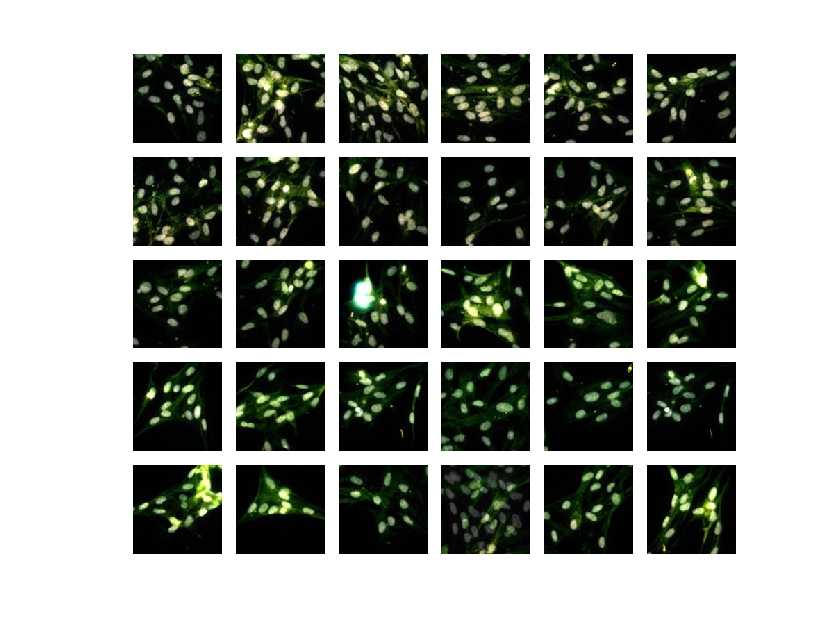

In [18]:
datasetImages.thumb_url = string(datasetImages.thumb_url);
nImagesInDataset = height(datasetImages);
thumb = cell(1, nImagesInDataset); % preallocate memory for cell array
for thisImage = 1:nImagesInDataset
    thumb{thisImage} = webread(baseUrl + datasetImages.thumb_url(thisImage)); 
end
figure
montage(thumb,"BorderSize",10,"BackgroundColor","white","ThumbnailSize",[128 128]);

Next, load a single full image from the selected dataset to look at it more closely. For this, you need the image number from the above montage

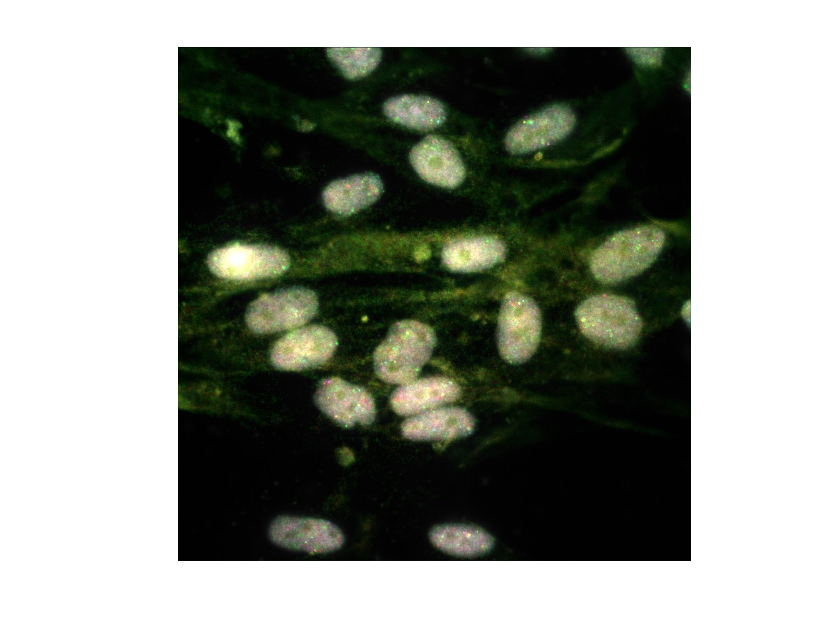

In [19]:
thisImage = 4;
thisImageUrl = baseUrl + "/webgateway/render_image/"+string(datasetImages.id(thisImage));
fullImage = webread(thisImageUrl); 
figure
imshow(fullImage)

## Simple Cell Counting (in the Image chosen above)
Use a very simple thresholding method to count cells in images.

First, convert the image to a grayscale image using the function im2gray

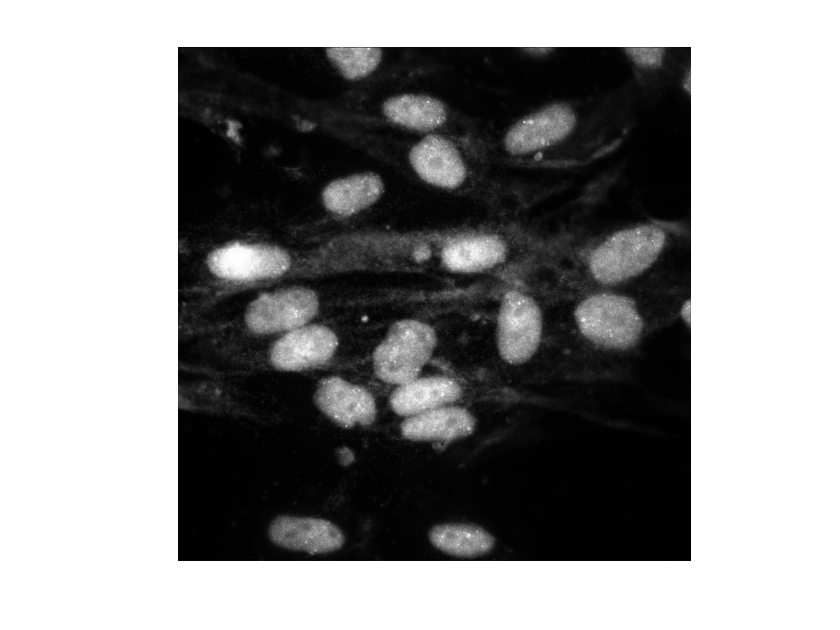

In [20]:
grayImage = im2gray(fullImage);
figure
imshow(grayImage)

Next, convert the grayscale image to a binary image using a user-specified threshold

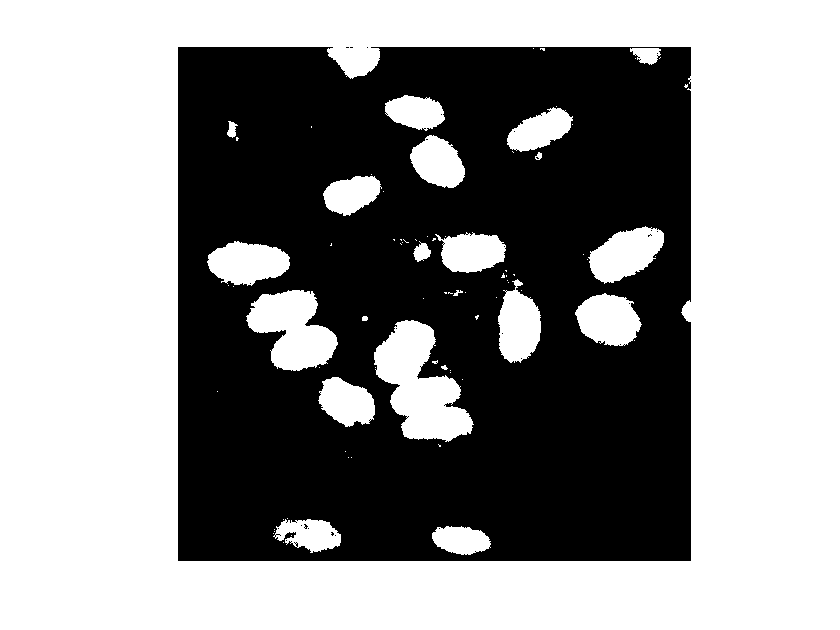

In [21]:
thr = 90;
bwImage = grayImage > thr;
figure
imshow(bwImage)

Now start counting the cells. Use the command regionprops to define the cells (white areas) and bwboundaries to draw boundaries around each cell

In [22]:
cells = regionprops(bwImage,"all");
boundaries = bwboundaries(bwImage,"noholes");

A user-defined minimal pixel count specifies criteria for defining cells and boundaries based on their total volume to reject small debris from being counted

In [23]:
minPixelCount = 200;
boundaries = boundaries([cells.Area] > minPixelCount);
cells = cells([cells.Area] > minPixelCount);
centroids = vertcat(cells.Centroid);

Plot the boundaries and centroids on top of the original image. The boundaries can be smoothed using the smoothingFactor user control object

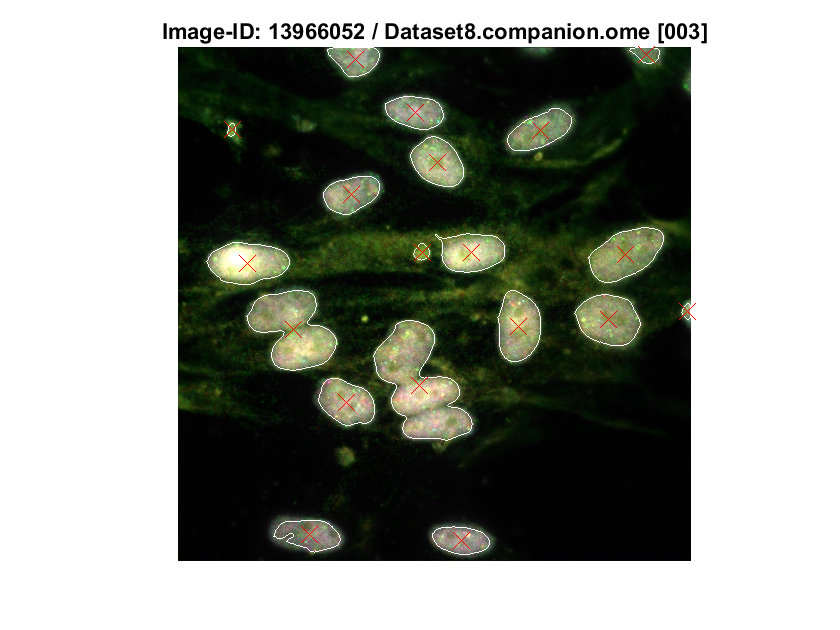

In [24]:
figure
imshow(fullImage);
smoothingFactor = 31; 
hold on
for iBound = 1:numel(boundaries)
    thisBound = boundaries{iBound};
    plot(smooth(thisBound(:,2),smoothingFactor), smooth(thisBound(:,1),smoothingFactor), 'w', 'LineWidth', 0.5);
end
plot(centroids(:,1), centroids(:,2),"rx", "MarkerSize",12)
title("Image-ID: " + num2str(datasetImages.id(3)) + " / " + datasetImages.name(3), "Interpreter","none");

## Publish reusable MATLAB code for reproducible results

To enable collaboration partners, reviewers and the community reuse your MATLAB code and reproduce your results.
- Publish your MATLAB code (eg: on GitHub) and generate a [DOI](https://en.wikipedia.org/wiki/Digital_object_identifier) (digital object identifier) by [linking it to a DOI generating portal](https://docs.github.com/en/repositories/archiving-a-github-repository/referencing-and-citing-content)(egs. [Figshare](https://help.figshare.com/article/how-to-connect-figshare-with-your-github-account#:~:text=You%20can%20get%20set%20up,where%20you'll%20authorise%20figshare.), Zenodo). Make your research output findable by including as much information as needed in the metadata. Document your code well explaining steps required to reproduce clearly and explicitly.
- [Link your GitHub repository to File Exchange](https://www.mathworks.com/matlabcentral/content/fx/about.html?s_tid=gn_mlc_fx_help#Why_GitHub) to make your MATLAB code available to MATLAB users via the Add-Ons button. 
            

<img src="FEX.png" width = "500" height = "200" />

- Make your MATLAB code **interoperable**. MATLAB is [interoperable](https://www.mathworks.com/products/matlab/matlab-and-other-programming-languages.html) with several other languages including C, Fortran and Python. MATLAB can be directly called from Python using the [MATLAB Engine for Python](https://www.mathworks.com/help/matlab/matlab-engine-for-python.html) which is available as a PyPI package and can be installed using the command `pip install matlab.engine` from Python. MATLAB code can also be [packaged as a Python library](https://www.mathworks.com/help/compiler_sdk/gs/create-a-python-application-with-matlab-code.html) and called from Python. Deep Learning models from other frameworks are [interoperable with MATLAB](https://www.mathworks.com/help/deeplearning/ug/interoperability-between-deep-learning-toolbox-tensorflow-pytorch-and-onnx.html) either using the [ONNX interface](https://www.mathworks.com/matlabcentral/fileexchange/67296-deep-learning-toolbox-converter-for-onnx-model-format) or via direct interfaces that exist, for example, for Pytorch and Tensorflow models. 

<img src="interopDeepLearning.png" width = "500" height = "200"/>

          
- MATLAB is interoperable with cloud architectures such as [JupyterHub](https://www.mathworks.com/products/reference-architectures/jupyter.html) and MATLAB code can also be used within Jupyter Notebooks. Here is a link to a Jupyter notebook of the same example used here. There is an official MATLAB kernel for Jupyter Notebooks - read about it [here](https://www.mathworks.com/products/reference-architectures/jupyter.html).
          

<video controls src="https://www.mathworks.com/products/reference-architectures/jupyter/_jcr_content/mainParsys/band/mainParsys/columns_copy/2/animation.animation.mp4/1677159762596.mp4" width = "600" height = "400"></video>

- Run your [MATLAB code on the browser directly from GitHub](https://www.mathworks.com/help/matlab/matlab_env/open-github-repositories-in-matlab-online.html). Copy and paste the GitHub repo address into [this app](https://www.mathworks.com/products/matlab-online/git.html). That will generate a command, which when pasted into your README, will create a "Open in MATLAB Online" button on your GitHub repository. By clicking on this button, users will be able to run your code in the browser on MATLAB Online. Read more [here](https://www.mathworks.com/products/matlab-online/git.html).
           

<img src="OWMOapp.png" width = "500" height = "200"/>

- Make your MATLAB code reproducible by using a reproducibility portals that supports MATLAB. One example is Code Ocean. On Code Ocean, you can [upload your MATLAB code](https://help.codeocean.com/en/articles/1120384-which-toolboxes-are-included-with-matlab) including dependencies. Once uploaded, your code is tested and published as a Code Ocean "capsule" which can be run online or downloaded and run locally by users. Code Ocean also generates a DOI for your code capsule. Here is the DOI for the Code Ocean capsule of the this code. Read more about MATLAB on Code Ocean [here](https://blogs.mathworks.com/loren/2021/07/15/sharing-and-running-matlab-code-in-the-cloud/#H_795BB86B).
         

<img src="CodeOcean.png" width = "500" height = "200"/> 

<div class="alert alert-block alert-danger"> 
    - <b>Warning:</b> Before making your code available on the cloud, make sure <b>all dependencies</b> including any data that is needed for your code to run <b>are uploaded along with the code</b>. Also make sure any path and/or filenames that refer to local directories are appropriately renamed. 
</div>

- FAIR standards: FAIR is an acronym that stands for **F**indable, **A**ccessible, **I**nteroperable and **R**eproducible. It is an [accepted standard]() for research output (code, data) and is often required for your research results to be in [compliance with "Open Science" standards](https://research-and-innovation.ec.europa.eu/strategy/strategy-2020-2024/our-digital-future/open-science_en). Adhering to the above pointers helps in making your MATLAB code FAIR